# Redes neuronales

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

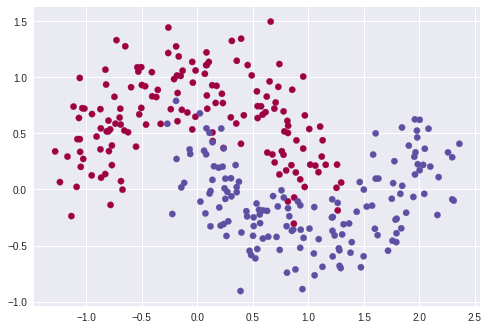

In [46]:
X, y = datasets.make_moons(300, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [47]:
X.shape

(300, 2)

In [48]:
y.shape

(300,)

## Red neuronal

In [0]:
def sigmoid(Z):
  return 1 / ( 1 + np.exp(-Z))

In [0]:
def relu(Z):
  return np.maximum(0, Z)

In [0]:
def prime_relu(Z):
  return np.heaviside(Z, 0)

In [0]:
def forward_propagation(X, W1, b1, W2, b2):
  forward_params = {}
  
  Z1 = np.dot(W1, X.T) + b1
  A1 = relu(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)
  
  forward_params = {
      "Z1": Z1,
      "A1": A1,
      "Z2": Z2,
      "A2": A2,
  }
  
  return forward_params

In [0]:
def loss_function(A2, y):
  data_size = y.shape[1]
  cost = (-1 / data_size) * (np.dot(y, np.log(A2).T) + np.dot(1 - y, np.log(1 - A2).T))
  return cost

In [0]:
def backward_propagation(forward_params, X, Y):
  A2 = forward_params["A2"]
  Z2 = forward_params["Z2"]
  A1 = forward_params["A1"]
  Z1 = forward_params["Z1"]
  
  data_size = Y.shape[1]
  
  dZ2 = A2 - Y
  dW2 = np.dot(dZ2, A1.T) / data_size
 
  db2 = np.sum(dZ2, axis=1) / data_size
  
  dZ1 = np.dot(dW2.T, dZ2) * prime_relu(Z1)
  dW1 = np.dot(dZ1, X) / data_size
  db1 = np.sum(dZ1, axis=1) / data_size
  
  db1 = np.reshape(db1, (db1.shape[0], 1))
  
  grads = {
      "dZ2": dZ2,
      "dW2": dW2,
      "db2": db2,
      "dZ1": dZ1,
      "dW1": dW1,
      "db1": db1,
  }
  
  return grads

In [0]:
def one_hidden_layer_model(X, y, epochs=1000, learning_rate=0.003):
  np.random.seed(0)
  input_size = X_train.shape[1]
  output_size = 1
  hidden_layer_nodes = 5

  W1 = np.random.randn(hidden_layer_nodes, input_size) / np.sqrt(input_size)
  b1 = np.zeros((hidden_layer_nodes, 1))
  W2 = np.random.randn(output_size, hidden_layer_nodes) / np.sqrt(hidden_layer_nodes)
  b2 = np.zeros((output_size, 1))
  
  loss_history = []
  
  for i in range(epochs):
    forward_params = forward_propagation(X, W1, b1, W2, b2)
    A2 = forward_params["A2"]
    loss = loss_function(A2, y)
    
    grads = backward_propagation(forward_params, X, y)
    
    W1 -= learning_rate * grads["dW1"]
    
    b1 -= learning_rate * grads["db1"]
   
    W2 -= learning_rate * grads["dW2"]
    b2 -= learning_rate * grads["db2"]
   
    
    if i % 1000 == 0:
      loss_history.append(loss)
      print ("Costo e iteracion %i: %f" % (i, loss))
      
  return W1, b1, W2, b2

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.20)

In [0]:
y_train = np.reshape(y_train, (1, y_train.shape[0]))
y_val = np.reshape(y_val, (1, y_val.shape[0]))

In [245]:
y_train.shape, y_val.shape

((1, 240), (1, 60))

In [255]:
W1, b1, W2, b2 = one_hidden_layer_model(X_train, y_train, epochs=20000, learning_rate=0.003)

Costo e iteracion 0: 0.774969
Costo e iteracion 1000: 0.549615
Costo e iteracion 2000: 0.477346
Costo e iteracion 3000: 0.441758
Costo e iteracion 4000: 0.420693
Costo e iteracion 5000: 0.406782
Costo e iteracion 6000: 0.396939
Costo e iteracion 7000: 0.389619
Costo e iteracion 8000: 0.383973
Costo e iteracion 9000: 0.379498
Costo e iteracion 10000: 0.375877
Costo e iteracion 11000: 0.372888
Costo e iteracion 12000: 0.370396
Costo e iteracion 13000: 0.368297
Costo e iteracion 14000: 0.366512
Costo e iteracion 15000: 0.364983
Costo e iteracion 16000: 0.363665
Costo e iteracion 17000: 0.362521
Costo e iteracion 18000: 0.361524
Costo e iteracion 19000: 0.360651


In [0]:
def predict(W1, b1, W2, b2, X):
  data_size = X.shape[0]
  forward_params = forward_propagation(X, W1, b1, W2, b2)
  
  y_prediction = np.zeros((1, data_size))
  
  A2 = forward_params["A2"]
  
  for i in range(A2.shape[1]):
    y_prediction[0, i] = 1 if A2[0, i] > 0.5 else 0
    
  return y_prediction

In [256]:
train_predictions = predict(W1, b1, W2, b2, X_train)
validation_predictions = predict(W1, b1, W2, b2, X_val)
  
print("train accuracy: {} %".format(100 - np.mean(np.abs(train_predictions - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(validation_predictions - y_val)) * 100))

train accuracy: 85.41666666666667 %
test accuracy: 83.33333333333334 %


In [0]:
logisticRegression = LogisticRegression().fit(X, y)

In [0]:
def plot_decision_boundary(pred):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = pred(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

(158565,)
[1 1 1 ... 0 0 0]


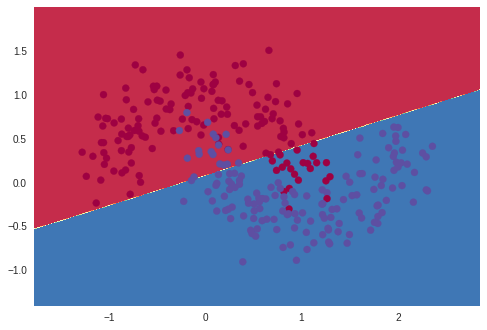

In [179]:
plot_decision_boundary(lambda x: logisticRegression.predict(x))

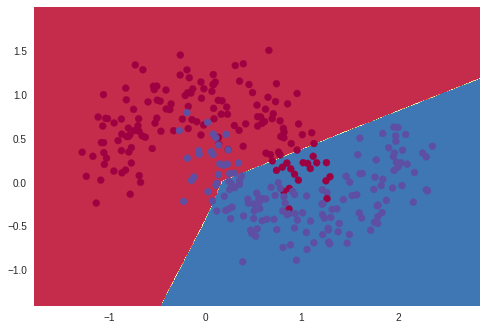

In [257]:
plot_decision_boundary(lambda x: predict(W1, b1, W2, b2, x))